In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
df1 = pd.read_csv('utilities_disconnection.csv',sep=';')
df2 = pd.read_csv('utilities_disconnection_planilha2.csv',sep=';')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618346 entries, 0 to 618345
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                618346 non-null  int64  
 1   regional                 618346 non-null  int64  
 2   site                     618346 non-null  int64  
 3   client_class             618346 non-null  int64  
 4   client_subclass          618346 non-null  int64  
 5   connection_type          618346 non-null  object 
 6   connection_status        618346 non-null  object 
 7   installment_value        618346 non-null  float64
 8   installment_status       247561 non-null  object 
 9   total_debt               618346 non-null  float64
 10  total_bills              618346 non-null  int64  
 11  disconnection_date       618346 non-null  object 
 12  disconnection_requested  618346 non-null  object 
 13  contractor_id            618346 non-null  int64  
 14  disc

In [4]:
df1.drop_duplicates(inplace=True)

In [5]:
df1.isna().sum()

client_id                       0
regional                        0
site                            0
client_class                    0
client_subclass                 0
connection_type                 0
connection_status               0
installment_value               0
installment_status         370736
total_debt                      0
total_bills                     0
disconnection_date              0
disconnection_requested         0
contractor_id                   0
disconnection_executed          0
collected                       0
dtype: int64

In [6]:
# substituir valores nulos por -1

df1['installment_status'].fillna(-1, inplace=True)

In [7]:
pysqldf("""select connection_status, count(connection_status) from df1
where collected = 1
group by connection_status
""")

,connection_status,count(connection_status)
0,connected,264623
1,disconnected,3468


In [8]:
pysqldf("""select connection_status, count(connection_status) from df1
where collected = 0
group by connection_status
""")

,connection_status,count(connection_status)
0,connected,48367
1,disconnected,301746


In [9]:
pysqldf = lambda q: sqldf(q, globals())
pysqldf("""select * from df1
where disconnection_requested <> disconnection_executed
""")

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,4,2,22212,1,1,biphasic connection,disconnected,2172.29,complete,484.10,4,16/03/2017,pole,156,circuit_break,0
1,6,4,42491,1,1,three-phase connection,connected,1487.33,current,1816.14,2,15/03/2017,remote,272,circuit_break,1
2,20,3,32281,1,1,biphasic connection,connected,0.00,-1,736.01,4,20/03/2017,pole,189,circuit_break,1
3,29,1,12390,1,1,single-phase connection,disconnected,0.00,-1,750.18,2,28/03/2017,circuit_break,20,branch,0
4,31,2,22330,1,1,single-phase connection,disconnected,387.36,complete,567.35,7,17/03/2017,circuit_break,166,pole,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124748,157324,4,42401,1,1,three-phase connection,disconnected,0.00,-1,2257.08,10,28/02/2018,pole,272,circuit_break,0
124749,340348,4,42401,1,1,biphasic connection,disconnected,0.00,-1,357.57,1,28/02/2018,pole,272,circuit_break,0
124750,898374,4,42401,1,1,three-phase connection,disconnected,0.00,-1,752.32,7,28/02/2018,pole,272,circuit_break,0
124751,157337,4,42401,1,1,biphasic connection,disconnected,0.00,-1,312.56,3,28/02/2018,pole,272,circuit_break,0


In [10]:
pysqldf("""select disconnection_requested, count(disconnection_requested) from df1
where collected = 1
group by disconnection_requested
""")

,disconnection_requested,count(disconnection_requested)
0,branch,5097
1,circuit_break,87272
2,pole,23293
3,remote,152429


In [11]:
pysqldf("""select regional, count(regional) from df1
where disconnection_requested <> disconnection_executed
group by regional
""")

,regional,count(regional)
0,1,51289
1,2,7313
2,3,15106
3,4,51045


In [12]:
pysqldf("""select regional, count(regional) from df1
where disconnection_requested = 'remote'
group by regional
""")

,regional,count(regional)
0,1,27177
1,2,228196
2,4,29


c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/03/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/03/2017' in DD/MM/YYYY format. Provide format o

<AxesSubplot: >

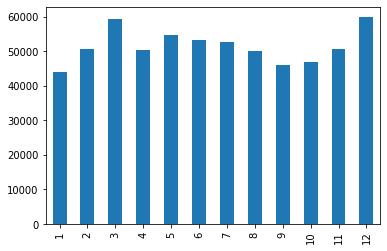

In [13]:
# plot time series of disconnection_date

df1['disconnection_date'] = pd.to_datetime(df1['disconnection_date'])
df1['disconnection_date'].dt.month.value_counts().sort_index().plot(kind='bar')


In [14]:
df1.groupby('client_id')['regional'].count().sort_values(ascending=False)

client_id
181679     16
61993      15
170146     15
39037      15
174430     15
           ..
328574      1
328571      1
328568      1
328567      1
1100749     1
Name: regional, Length: 418463, dtype: int64

In [15]:
df1.head(10)

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,installment_value,installment_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,252.39,complete,662.62,4,2017-06-03,circuit_break,66,circuit_break,0
1,1,1,14071,1,1,single-phase connection,disconnected,0.00,-1,1202.45,17,2017-03-31,circuit_break,73,circuit_break,0
2,2,1,12380,1,1,biphasic connection,disconnected,0.00,-1,352.56,1,2017-03-20,circuit_break,20,circuit_break,0
3,3,1,14071,1,1,biphasic connection,disconnected,1317.25,complete,699.23,9,2017-03-29,pole,73,pole,0
4,4,2,22212,1,1,biphasic connection,disconnected,2172.29,complete,484.10,4,2017-03-16,pole,156,circuit_break,0
5,5,3,32281,3,1,single-phase connection,disconnected,295.55,current,160.90,1,2017-03-31,circuit_break,189,circuit_break,0
6,6,4,42491,1,1,three-phase connection,connected,1487.33,current,1816.14,2,2017-03-15,remote,272,circuit_break,1
7,7,1,12390,1,1,biphasic connection,disconnected,0.00,-1,3170.49,10,2017-03-15,circuit_break,20,circuit_break,0
8,8,1,13414,1,1,biphasic connection,disconnected,2079.39,complete,1927.97,4,2017-06-03,circuit_break,66,circuit_break,0
9,9,1,14071,1,1,three-phase connection,disconnected,786.25,complete,2069.34,8,2017-03-15,pole,73,pole,0


# Data preparing

In [16]:
df1.drop(['installment_status','installment_value'], axis=1, inplace=True)

In [17]:
df2

,disconnection_requested,regional,cost
0,circuit_break,1,12.05
1,circuit_break,2,11.04
2,circuit_break,3,13.67
3,circuit_break,4,10.76
4,pole,1,23.21
5,pole,2,20.89
6,pole,3,26.74
7,pole,4,19.32
8,branch,1,60.05
9,branch,2,54.76


In [18]:
sum = df2.groupby('regional')['cost'].sum().to_list()

sum

[96.34, 87.72, 99.88, 96.91]

In [19]:
dict_cost_by_regional = {1:[],2:[],3:[],4:[]}

for row in df2.itertuples():
	dict_cost_by_regional[row.regional].append(row.cost)

dict_cost_by_regional

{1: [12.05, 23.21, 60.05, 1.03],
 2: [11.04, 20.89, 54.76, 1.03],
 3: [13.67, 26.74, 58.44, 1.03],
 4: [10.76, 19.32, 65.8, 1.03]}

In [20]:
for key, value in dict_cost_by_regional.items():
	for i in range(len(value)):
		value[i] = value[i]/sum[key-1]

for key in dict_cost_by_regional.keys():
	dict_cost_by_regional[key] = np.array(dict_cost_by_regional[key])

dict_cost_by_regional

{1: array([0.12507785, 0.24091758, 0.62331327, 0.0106913 ]),
 2: array([0.12585499, 0.23814409, 0.62425901, 0.01174191]),
 3: array([0.13686424, 0.26772127, 0.58510212, 0.01031237]),
 4: array([0.11103085, 0.19936023, 0.6789805 , 0.01062842])}

In [21]:
# one hot enconding class in region

dummie_regional_DF = pd.get_dummies(df1['regional'])

req_DF = df1['disconnection_requested']

req_DF = req_DF.replace({'circuit_break':0,'pole':1,'branch':2,'remote':3})

exec_DF = df1['disconnection_executed']

exec_DF = exec_DF.replace({'circuit_break':0,'pole':1,'branch':2,'remote':3})


In [22]:
exec_np = exec_DF.to_numpy()
req_np = req_DF.to_numpy()
dummie_regional_list1 = dummie_regional_DF.to_numpy().tolist()
dummie_regional_list2 = dummie_regional_DF.to_numpy().tolist()

exec_list = []
req_list = []

i = 0
while i < len(exec_DF):
	for j in range(1,5):
		if dummie_regional_list1[i][j-1] == 1:
			#print(dict_cost_by_regional[j][req_np[i]])
			exec_list.append(dict_cost_by_regional[j][exec_np[i]])
			req_list.append(dict_cost_by_regional[j][req_np[i]])
			dummie_regional_list1[i][j-1] = dict_cost_by_regional[j][exec_np[i]]
			dummie_regional_list2[i][j-1] = dict_cost_by_regional[j][req_np[i]]
			break
	i += 1

In [23]:
dummie_regional_list1 = pd.DataFrame(dummie_regional_list1,columns=['req_regional1','req_regional2','req_regional3','req_regional4'])
dummie_regional_list2 = pd.DataFrame(dummie_regional_list2,columns=['exec_regional1','exec_regional2','exec_regional3','exec_regional4'])

In [24]:
dummie_regional_list1

,req_regional1,req_regional2,req_regional3,req_regional4
0,0.125078,0.000000,0.0,0.000000
1,0.125078,0.000000,0.0,0.000000
2,0.125078,0.000000,0.0,0.000000
3,0.240918,0.000000,0.0,0.000000
4,0.000000,0.125855,0.0,0.000000
...,...,...,...,...
618199,0.000000,0.000000,0.0,0.111031
618200,0.000000,0.000000,0.0,0.111031
618201,0.125078,0.000000,0.0,0.000000
618202,0.000000,0.000000,0.0,0.199360


In [25]:
# others columns One Hot Enconding

dummie_conn_DF = pd.get_dummies(df1['connection_type'])
dumbie_client_class_DF = pd.get_dummies(df1['client_class'])
dumbie_client_subclass_DF = pd.get_dummies(df1['client_subclass'])


In [26]:
df1.head()

,client_id,regional,site,client_class,client_subclass,connection_type,connection_status,total_debt,total_bills,disconnection_date,disconnection_requested,contractor_id,disconnection_executed,collected
0,0,1,13414,1,7,single-phase connection,disconnected,662.62,4,2017-06-03,circuit_break,66,circuit_break,0
1,1,1,14071,1,1,single-phase connection,disconnected,1202.45,17,2017-03-31,circuit_break,73,circuit_break,0
2,2,1,12380,1,1,biphasic connection,disconnected,352.56,1,2017-03-20,circuit_break,20,circuit_break,0
3,3,1,14071,1,1,biphasic connection,disconnected,699.23,9,2017-03-29,pole,73,pole,0
4,4,2,22212,1,1,biphasic connection,disconnected,484.10,4,2017-03-16,pole,156,circuit_break,0


In [27]:
df_to_model = pd.concat([df1[['total_debt','total_bills','collected']],dummie_conn_DF,dumbie_client_class_DF,dumbie_client_subclass_DF,dummie_regional_list1,dummie_regional_list2], axis=1)

In [36]:
df_to_model.dropna(inplace=True)

# Class model training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
X = df_to_model.drop(['collected',"req_regional1", "req_regional2",	"req_regional3",	"req_regional4"], axis=1)
y = df_to_model['collected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.

              precision    recall  f1-score   support

         0.0       0.63      0.80      0.70    104766
         1.0       0.60      0.39      0.47     80653

    accuracy                           0.62    185419
   macro avg       0.61      0.59      0.59    185419
weighted avg       0.62      0.62      0.60    185419



<AxesSubplot: >

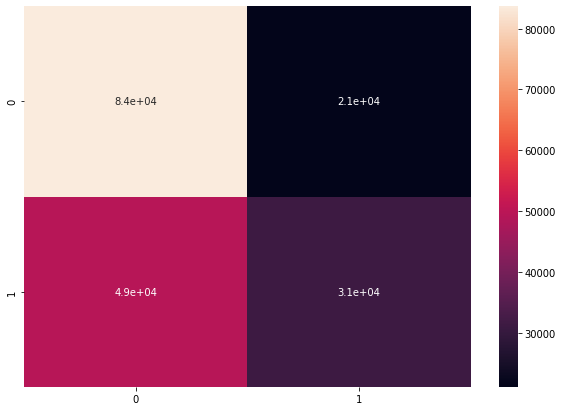

In [42]:
# plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)